CMSC 422 Final Project:
Trevor Tabit and Serena Tong


Importing our dataset into the notebook. The dataset can be found at https://www.kaggle.com/datasets/moltean/fruits

In [1]:
from sklearn.datasets import load_files
import numpy as np


train_data = '/Users/trevo/OneDrive/Documents/422_Final/fruits-360/Training/'
test_data = '/Users/trevo/OneDrive/Documents/422_Final/fruits-360/Test'


test_files = load_files(test_data)
x_test = np.array(test_files['filenames'])
y_test = np.array(test_files['target'])
test_labels = np.array(test_files['target_names'])

train_files = load_files(train_data)
x_train = np.array(train_files['filenames'])
y_train = np.array(train_files['target'])
train_labels = np.array(train_files['target_names'])

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])
print('Unique classes: ', len(np.unique(y_train)))


Training set size :  67692
Testing set size :  22688
Unique classes:  131


Setting up categorical variables:

In [2]:
from keras.utils import np_utils

unique_elem = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, unique_elem)
y_test = np_utils.to_categorical(y_test, unique_elem)


Test set:

In [4]:
x_test = x_test[10000:]
y_test = y_test[10000:]


Converting our images into arrays:

In [6]:
from tensorflow.keras.utils import img_to_array, load_img
import numpy as np

def img_to_ar(files):
    image_array=[]
    for f in files:
        image_array.append(img_to_array(load_img(f)))
    return image_array

x_train = np.array(img_to_ar(x_train))
x_test = np.array(img_to_ar(x_test))

Shrinking our training data to allow for managable storage sizes

In [7]:
x_trainIP = x_train[0:40000]
x_testIP = x_test
y_trainIP = y_train[0:40000]
y_testIP = y_test
print(y_testIP.shape)
print(x_testIP.shape)
print(y_trainIP.shape)
print(x_trainIP.shape)

(12688, 131)
(12688, 100, 100, 3)
(40000, 131)
(40000, 100, 100, 3)


In [8]:
import matplotlib.pyplot as plt
x_testIP = x_testIP.astype('float32')/255
x_trainIP = x_trainIP.astype('float32')/255
print(x_trainIP.shape)





(40000, 100, 100, 3)


In [9]:
x_validIP = x_valid
x_validIP =  x_validIP.astype('float32')/255
print(x_validIP.shape)

(10000, 100, 100, 3)


Printing our example fruit from our training set:

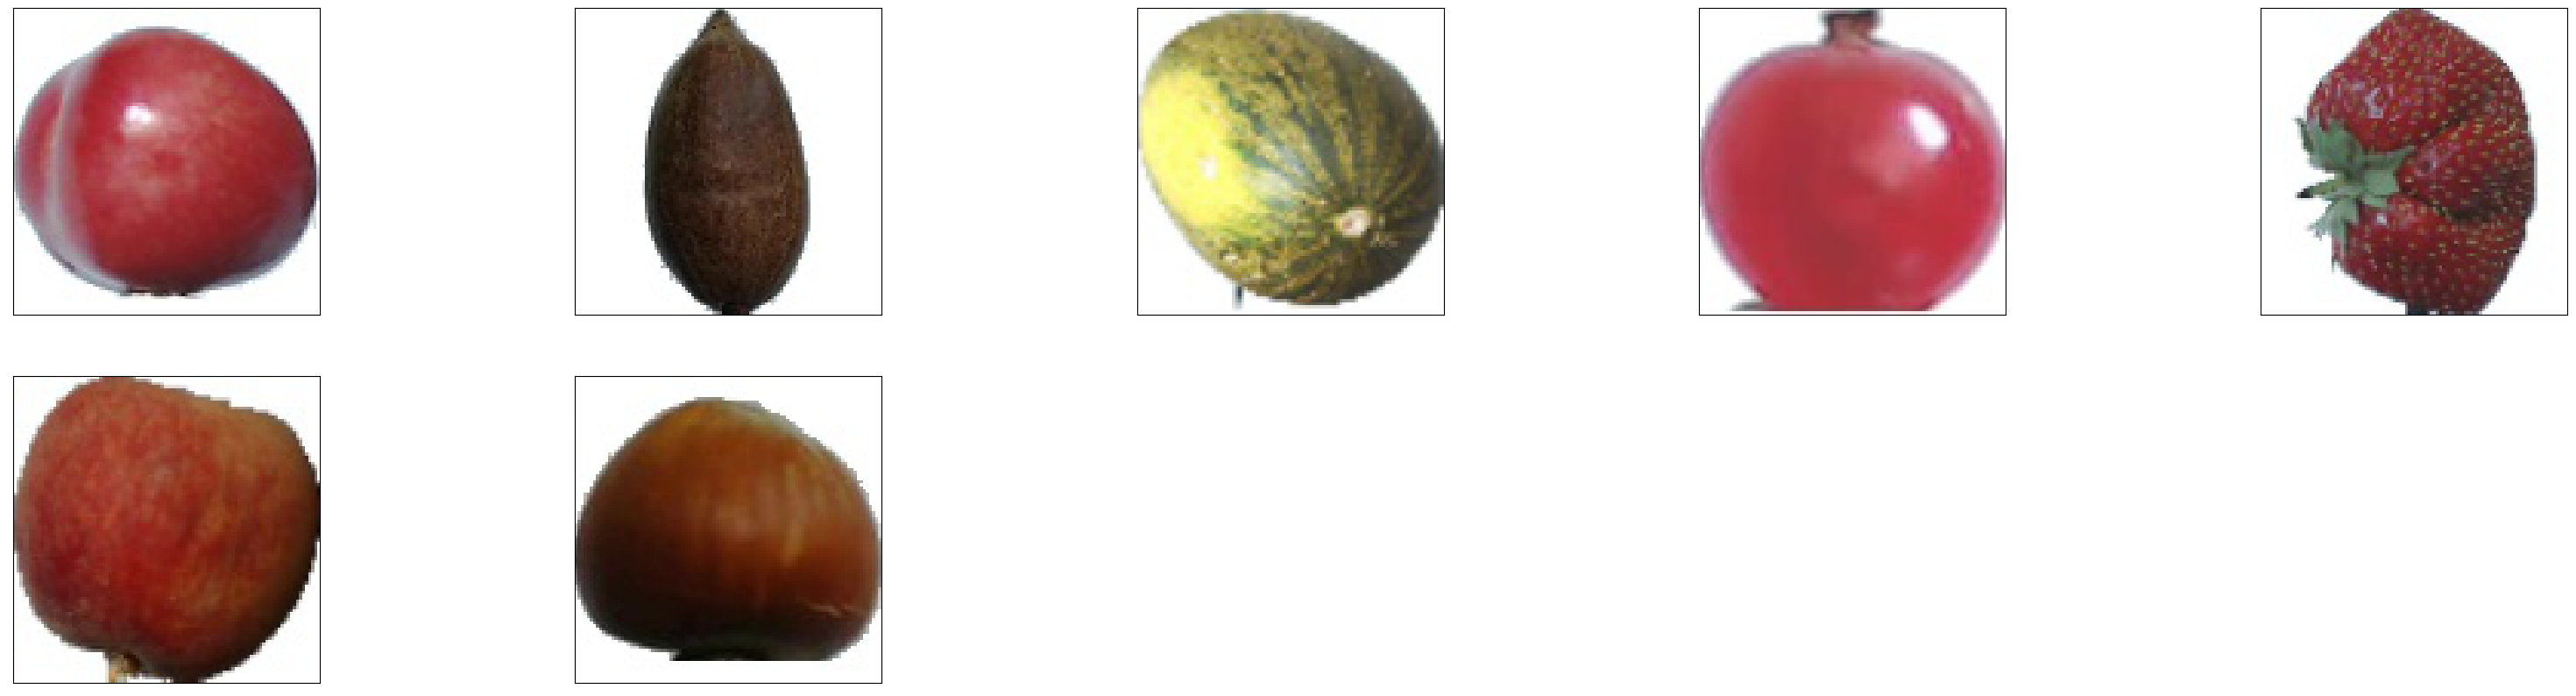

In [10]:
fig = plt.figure(figsize =(40,10))
for i in range(7):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_trainIP[i]))

Creation of our neural network layers:

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import keras
import tensorflow as tf
from tensorflow.keras import layers

In [27]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 256,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dense(131,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 100, 100, 32)      416       
                                                                 
 activation_4 (Activation)   (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 64)        8256      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 25, 25, 128)      

RMSprop optimizer:

In [13]:

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn.hdf5', verbose = 0, save_best_only = True)

model_run = model.fit(x_trainIP,y_trainIP,
        batch_size = 32,
        epochs=5,
        validation_data=(x_testIP, y_test),
        callbacks = [checkpointer],
        verbose=1, shuffle=True)

Compiled!
Epoch 1/5
1250/1250 [==============================] - 332s 264ms/step - loss: 1.3886 - accuracy: 0.6203 - val_loss: 0.4356 - val_accuracy: 0.8692
Epoch 2/5
1250/1250 [==============================] - 313s 251ms/step - loss: 0.1854 - accuracy: 0.9385 - val_loss: 0.2581 - val_accuracy: 0.9316
Epoch 3/5
1250/1250 [==============================] - 310s 248ms/step - loss: 0.0927 - accuracy: 0.9701 - val_loss: 0.1629 - val_accuracy: 0.9576
Epoch 4/5
1250/1250 [==============================] - 311s 249ms/step - loss: 0.0661 - accuracy: 0.9791 - val_loss: 0.2359 - val_accuracy: 0.9407
Epoch 5/5
1250/1250 [==============================] - 305s 244ms/step - loss: 0.0512 - accuracy: 0.9849 - val_loss: 0.2587 - val_accuracy: 0.9445


In [14]:
score = model.evaluate(x_testIP, y_testIP, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.2587449848651886
Test accuracy: 0.9445145130157471


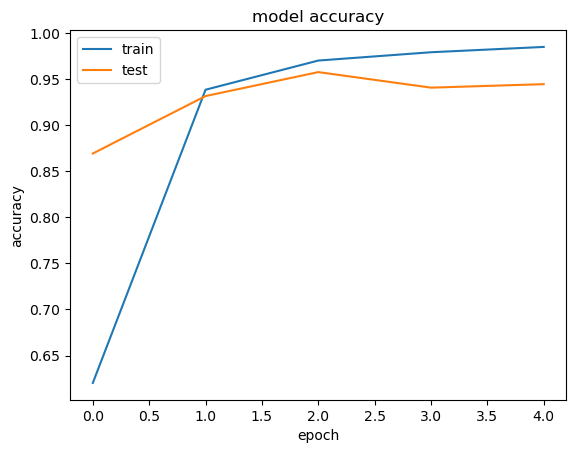

In [16]:
import matplotlib.pyplot as plt 
plt.figure(1)  

plt.plot(model_run.history['accuracy'])
plt.plot(model_run.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')



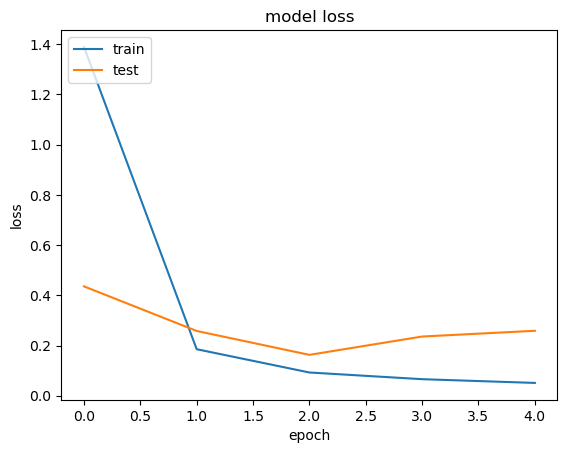

In [17]:
plt.plot(model_run.history['loss'])
plt.plot(model_run.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Adam optimizer:

In [23]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print('Compiled!')

batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn.hdf5', verbose = 0, save_best_only = True)

history = model.fit(x_trainIP,y_trainIP,
        batch_size = 32,
        epochs=5,
        validation_data=(x_testIP, y_test),
        callbacks = [checkpointer],
        verbose=1, shuffle=True)

Compiled!
Epoch 1/5
1250/1250 [==============================] - 309s 247ms/step - loss: 2.5494 - accuracy: 0.3371 - val_loss: 1.1799 - val_accuracy: 0.6719
Epoch 2/5
1250/1250 [==============================] - 291s 233ms/step - loss: 1.1315 - accuracy: 0.6494 - val_loss: 0.7694 - val_accuracy: 0.7742
Epoch 3/5
1250/1250 [==============================] - 292s 234ms/step - loss: 0.8330 - accuracy: 0.7312 - val_loss: 0.6222 - val_accuracy: 0.8019
Epoch 4/5
1250/1250 [==============================] - 320s 256ms/step - loss: 0.7271 - accuracy: 0.7617 - val_loss: 0.6516 - val_accuracy: 0.8058
Epoch 5/5
1250/1250 [==============================] - 306s 244ms/step - loss: 0.6837 - accuracy: 0.7789 - val_loss: 0.7766 - val_accuracy: 0.7496


In [24]:
score = model.evaluate(x_testIP, y_testIP, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.776617169380188
Test accuracy: 0.7496059536933899


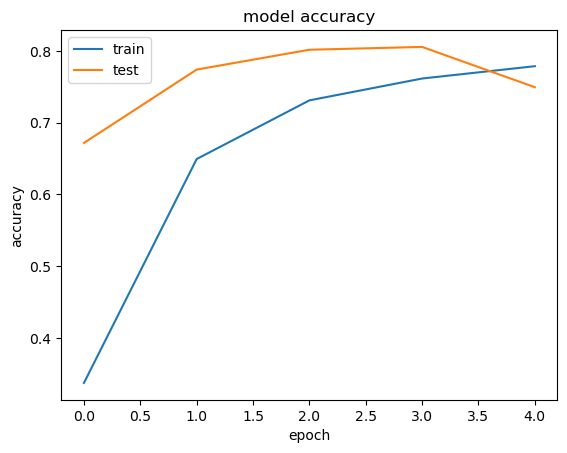

In [25]:
plt.figure(1)  

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

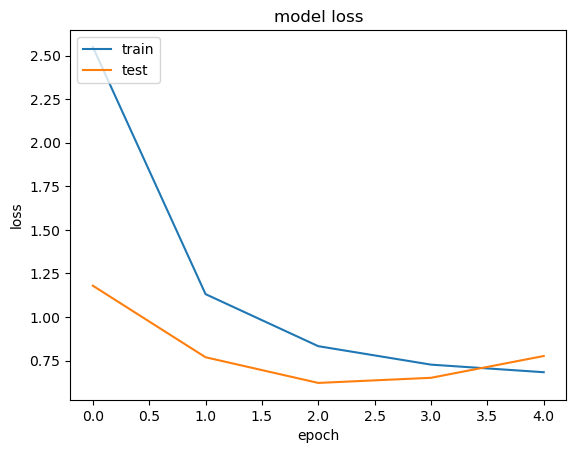

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

SGD optimizer 

In [ ]:
opt = tf.keras.optimizers.experimental.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print('Compiled!')

batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn.hdf5', verbose = 0, save_best_only = True)

history = model.fit(x_trainIP,y_trainIP,
        batch_size = 32,
        epochs=5,
        validation_data=(x_testIP, y_test),
        callbacks = [checkpointer],
        verbose=1, shuffle=True)

Compiled!
Epoch 1/5
1250/1250 [==============================] - 399s 317ms/step - loss: 0.8701 - accuracy: 0.7963 - val_loss: 0.3541 - val_accuracy: 0.9159
Epoch 2/5
1250/1250 [==============================] - 385s 308ms/step - loss: 0.3163 - accuracy: 0.9178 - val_loss: 0.3515 - val_accuracy: 0.9273
Epoch 3/5
1250/1250 [==============================] - 331s 265ms/step - loss: 0.1634 - accuracy: 0.9537 - val_loss: 0.2859 - val_accuracy: 0.9444
Epoch 4/5
1250/1250 [==============================] - 323s 259ms/step - loss: 0.1542 - accuracy: 0.9588 - val_loss: 0.3172 - val_accuracy: 0.9372
Epoch 5/5
1250/1250 [==============================] - 317s 254ms/step - loss: 0.1455 - accuracy: 0.9609 - val_loss: 0.2837 - val_accuracy: 0.9449


In [ ]:
score = model.evaluate(x_testIP, y_testIP, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.28372153639793396
Test accuracy: 0.9449085593223572


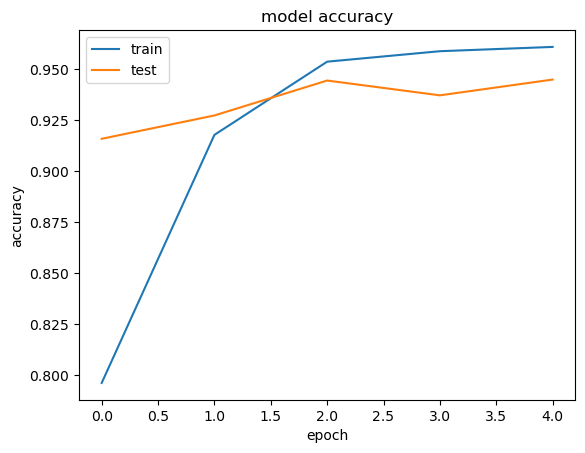

In [ ]:
plt.figure(1)  

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

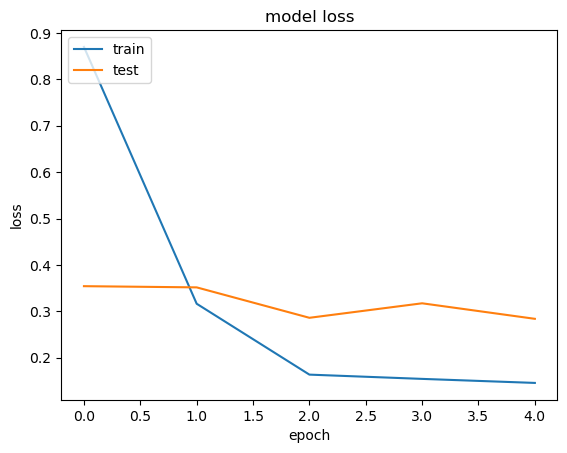

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Adadelta optimizer: 

In [ ]:
opt = tf.keras.optimizers.Adadelta(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print('Compiled!')

batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn.hdf5', verbose = 0, save_best_only = True)

history = model.fit(x_trainIP,y_trainIP,
        batch_size = 32,
        epochs=5,
        validation_data=(x_testIP, y_test),
        callbacks = [checkpointer],
        verbose=1, shuffle=True)

Compiled!
Epoch 1/5
1250/1250 [==============================] - 308s 244ms/step - loss: 0.1138 - accuracy: 0.9659 - val_loss: 0.2791 - val_accuracy: 0.9455
Epoch 2/5
1250/1250 [==============================] - 359s 287ms/step - loss: 0.1101 - accuracy: 0.9663 - val_loss: 0.2754 - val_accuracy: 0.9462
Epoch 3/5
1250/1250 [==============================] - 374s 300ms/step - loss: 0.1074 - accuracy: 0.9686 - val_loss: 0.2722 - val_accuracy: 0.9470
Epoch 4/5
1250/1250 [==============================] - 351s 281ms/step - loss: 0.1034 - accuracy: 0.9693 - val_loss: 0.2694 - val_accuracy: 0.9474
Epoch 5/5
1250/1250 [==============================] - 343s 274ms/step - loss: 0.0993 - accuracy: 0.9699 - val_loss: 0.2669 - val_accuracy: 0.9474


In [ ]:
score = model.evaluate(x_testIP, y_testIP, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.26689422130584717
Test accuracy: 0.9474306702613831


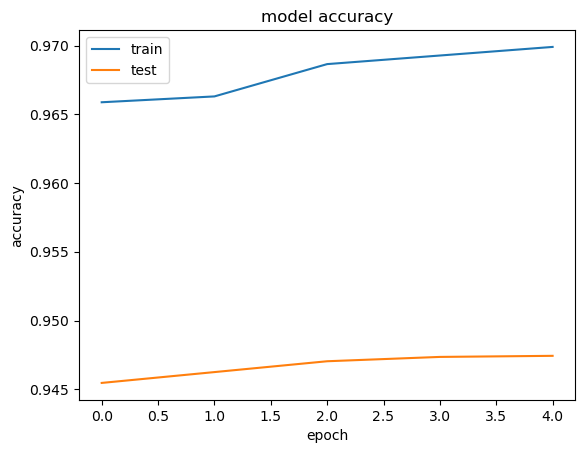

In [ ]:
plt.figure(1)  

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

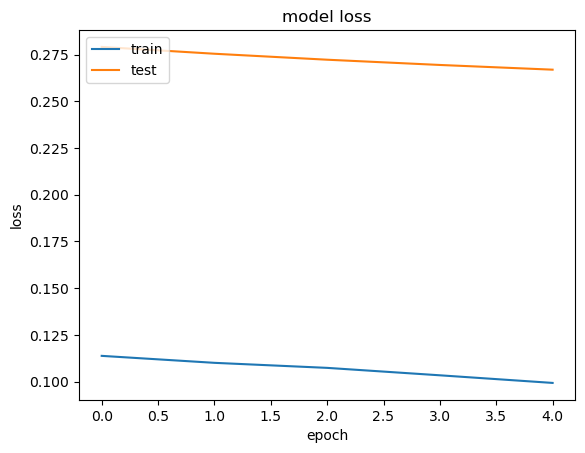

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()